# ANOVA 

Hay ciertas suposiciones que debemos hacer antes de realizar ANOVA:

1.Las observaciones se obtienen de forma independiente y aleatoria de la población definida por los niveles de los factores.

2.Los datos para cada nivel de factor se distribuyen normalmente

3.Independencia de los casos: los casos de muestra deben ser independientes entre sí

4.Homogeneidad de varianza: la homogeneidad significa que la varianza entre los grupos debe ser aproximadamente igual

El supuesto de homogeneidad de la varianza se puede probar utilizando pruebas como la prueba de Levene o la prueba de Brown-Forsythe. La normalidad de la distribución de las puntuaciones se puede probar usando histogramas, los valores de asimetría y curtosis, o usando pruebas como Shapiro-Wilk o Kolmogorov-Smirnov o QQ plot. El supuesto de independencia se puede determinar a partir del diseño del estudio.

Es importante señalar que ANOVA no es robusto a las violaciones al supuesto de independencia. Esto quiere decir que incluso si viola los supuestos de homogeneidad o normalidad, puede realizar la prueba y básicamente confiar en los hallazgos.

Sin embargo, los resultados de ANOVA no son válidos si se viola el supuesto de independencia. En general, con violaciones de homogeneidad, el análisis se considera robusto si tiene grupos de igual tamaño. Con violaciones de la normalidad, continuar con ANOVA generalmente está bien si tiene un tamaño de muestra grande.

In [17]:
import pandas as pd

datafile = "PlantGrowth.csv"
data = pd.read_csv(datafile)



In [27]:
data.head()

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [29]:
data["group"].unique()

array(['ctrl', 'trt1', 'trt2'], dtype=object)

¿Cuándo necesitarás usar el análisis ANOVA?

Situación 1: Cuando tenemos un grupo de individuos divididos aleatoriamente en grupos más pequeños bajo distinto tratamiento. Por ejemplo, usted podría estar estudiando los efectos del té en la pérdida de peso y formar tres grupos: el té verde, té negro, y sin té.

Situación 2: Similar a la situación 1, pero en este caso los individuos se dividen en grupos basados en un atributo que poseen. Por ejemplo, usted podría estar estudiando la fuerza de las piernas de las personas de acuerdo al peso. Podría dividir a los participantes en categorías de peso (obesidad, sobrepeso y normal) y medir la fuerza de sus piernas en una máquina de peso.

Estos datos son sobre el crecimiento de plantas y sus tres grupos que se agrupan en sus pesos.


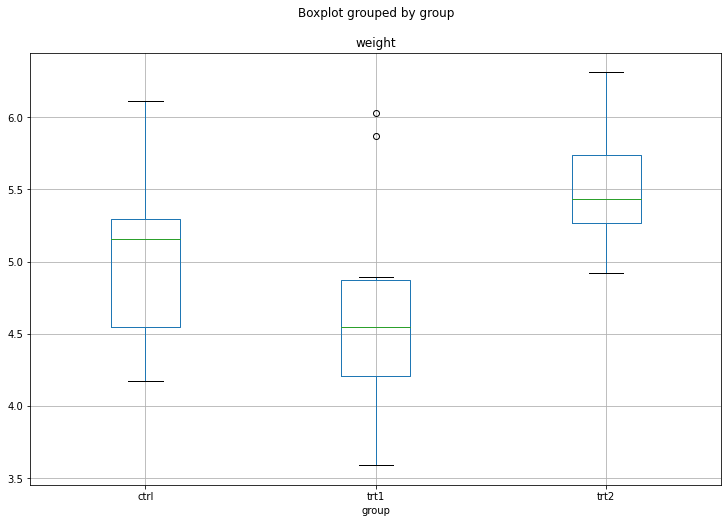

In [38]:
#Create a boxplot
data.boxplot('weight', by='group', figsize=(12, 8))


In [32]:
data["group"].value_counts()

ctrl    10
trt2    10
trt1    10
Name: group, dtype: int64

In [43]:
df_grouped = data[['group', 'weight']].groupby(['group'])

In [44]:
df.head()

,group,weight
0,ctrl,4.17
1,ctrl,5.58
2,ctrl,5.18
3,ctrl,6.11
4,ctrl,4.50
10,trt1,4.81
11,trt1,4.17
12,trt1,4.41
13,trt1,3.59
14,trt1,5.87


In [45]:
from scipy import stats

In [46]:
# ANOVA
f_val, p_val = stats.f_oneway(df_grouped.get_group('ctrl')['weight'], df_grouped.get_group('trt1')['weight'], df_grouped.get_group('trt2')['weight'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 4.846087862380136 , P = 0.0159099583256229


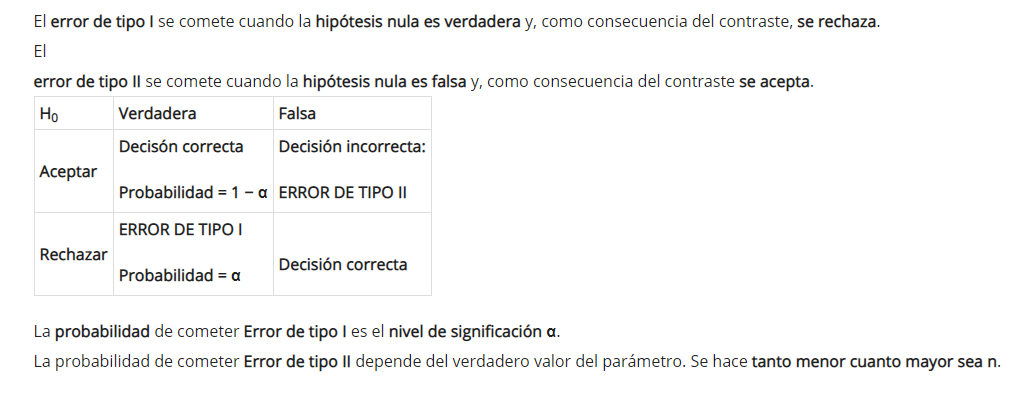

Se podria decir que el valor de F presenta un valor bajo por lo que no hay una fuerte correlacion, por otro lado el valor P se acerca a cero implicando una significancia estadistica significativa.